In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_student_data(num_students=100, num_semesters=8):
    np.random.seed(42)  # For reproducibility

    def generate_grades():
        return np.random.choice(['A', 'B', 'C', 'D', 'F'], p=[0.3, 0.35, 0.2, 0.1, 0.05])

    def generate_attendance():
        return round(np.random.uniform(70, 100), 2)

    def generate_skills_score():
        return round(np.random.uniform(1, 5), 2)

    # Creating student info
    students = []

    subjects = ['Mathematics', 'Computer Science', 'Physics', 'English', 'Data Science']
    skills = ['Technical', 'Communication', 'Problem Solving', 'Teamwork', 'Leadership']

    for student_id in range(1, num_students + 1):
        # Basic student info
        student_base = {
            'StudentID': f'STU{str(student_id).zfill(4)}',
            'Name': f'Student_{student_id}',
            'Program': 'FYUGP',
            'EnrollmentYear': 2024
        }

        # Creating semester-wise data
        for semester in range(1, num_semesters + 1):
            semester_data = student_base.copy()
            semester_data.update({
                'Semester': semester,
                'Attendance': generate_attendance()
            })

            # Adding subject grades
            for subject in subjects:
                semester_data[f'{subject}_Grade'] = generate_grades()

            # Adding skills assessment
            for skill in skills:
                semester_data[f'{skill}_Score'] = generate_skills_score()

            # Adding extracurricular activities
            semester_data['ExtracurricularParticipation'] = np.random.choice([0, 1], p=[0.3, 0.7])
            semester_data['LeadershipRoles'] = np.random.choice([0, 1], p=[0.8, 0.2])

            students.append(semester_data)

    # Convert to DataFrame
    df = pd.DataFrame(students)

    # Calculate cumulative metrics
    df['AverageAttendance'] = df.groupby('StudentID')['Attendance'].transform('mean')
    df['ExtracurricularScore'] = df['ExtracurricularParticipation'] + df['LeadershipRoles']

    return df

def save_to_csv(df, filename='student_data.csv'):
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")

# Generate example dataset
student_df = generate_student_data()
save_to_csv(student_df)

# Generate summary statistics
def generate_summary_stats(df):
    summary = {
        'Total Students': df['StudentID'].nunique(),
        'Semesters': df['Semester'].nunique(),
        'Average Attendance': df['Attendance'].mean(),
        'Grade Distribution': df['Mathematics_Grade'].value_counts().to_dict(),
        'Students with Leadership Roles': df['LeadershipRoles'].sum()
    }
    return summary

Dataset saved to student_data.csv


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading and preparing the data
def load_data():
    # Load the created student data
    df = pd.read_csv('student_data.csv')
    return df


In [31]:

# Basic data exploration
def explore_basic_stats(df):
    print("Dataset Shape:", df.shape)
    print("\nBasic Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    return df.describe()


In [32]:
# Grade analysis
def analyze_grades(df):
    grade_columns = [col for col in df.columns if col.endswith('_Grade')]

    # Convert grades to numeric values for analysis
    grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
    grade_df = df[grade_columns].replace(grade_map)

    # Calculate GPA
    df['GPA'] = grade_df.mean(axis=1)

    # Plot grade distribution
    plt.figure(figsize=(15, 6))
    for col in grade_columns:
        plt.subplot(2, 3, grade_columns.index(col) + 1)
        sns.countplot(data=df, x=col)
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=45)
    plt.tight_layout()
    return df

In [33]:
# Skills analysis
def analyze_skills(df):
    skill_columns = [col for col in df.columns if col.endswith('_Score')]

    # Calculate average skill scores
    skill_means = df[skill_columns].mean()

    # Create radar chart
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')

    angles = np.linspace(0, 2*np.pi, len(skill_columns), endpoint=False)
    values = skill_means.values

    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles)
    ax.set_xticklabels([col.replace('_Score', '') for col in skill_columns])
    plt.title('Average Skills Distribution')
    return skill_means

In [34]:
# Attendance analysis
def analyze_attendance(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Attendance', bins=30)
    plt.title('Attendance Distribution')

    attendance_stats = {
        'Mean Attendance': df['Attendance'].mean(),
        'Median Attendance': df['Attendance'].median(),
        'Std Attendance': df['Attendance'].std(),
        'Students Below 75%': (df['Attendance'] < 75).sum()
    }
    return attendance_stats

In [35]:
# Progress tracking
def analyze_progress(df):
    # Group by student and semester to track progress
    progress_df = df.groupby(['StudentID', 'Semester'])['GPA'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=progress_df, x='Semester', y='GPA', ci=None)
    plt.title('Average GPA Progress Across Semesters')

    return progress_df


In [36]:
# Main analysis
if __name__ == "__main__":
    # Load data
    df = load_data()

    # Perform analyses
    basic_stats = explore_basic_stats(df)


Dataset Shape: (800, 20)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   StudentID                     800 non-null    object 
 1   Name                          800 non-null    object 
 2   Program                       800 non-null    object 
 3   EnrollmentYear                800 non-null    int64  
 4   Semester                      800 non-null    int64  
 5   Attendance                    800 non-null    float64
 6   Mathematics_Grade             800 non-null    object 
 7   Computer Science_Grade        800 non-null    object 
 8   Physics_Grade                 800 non-null    object 
 9   English_Grade                 800 non-null    object 
 10  Data Science_Grade            800 non-null    object 
 11  Technical_Score               800 non-null    float64
 12  Communication_Score

C:\Users\Bacardi\AppData\Local\Temp\ipykernel_8428\3721562873.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grade_df = df[grade_columns].replace(grade_map)


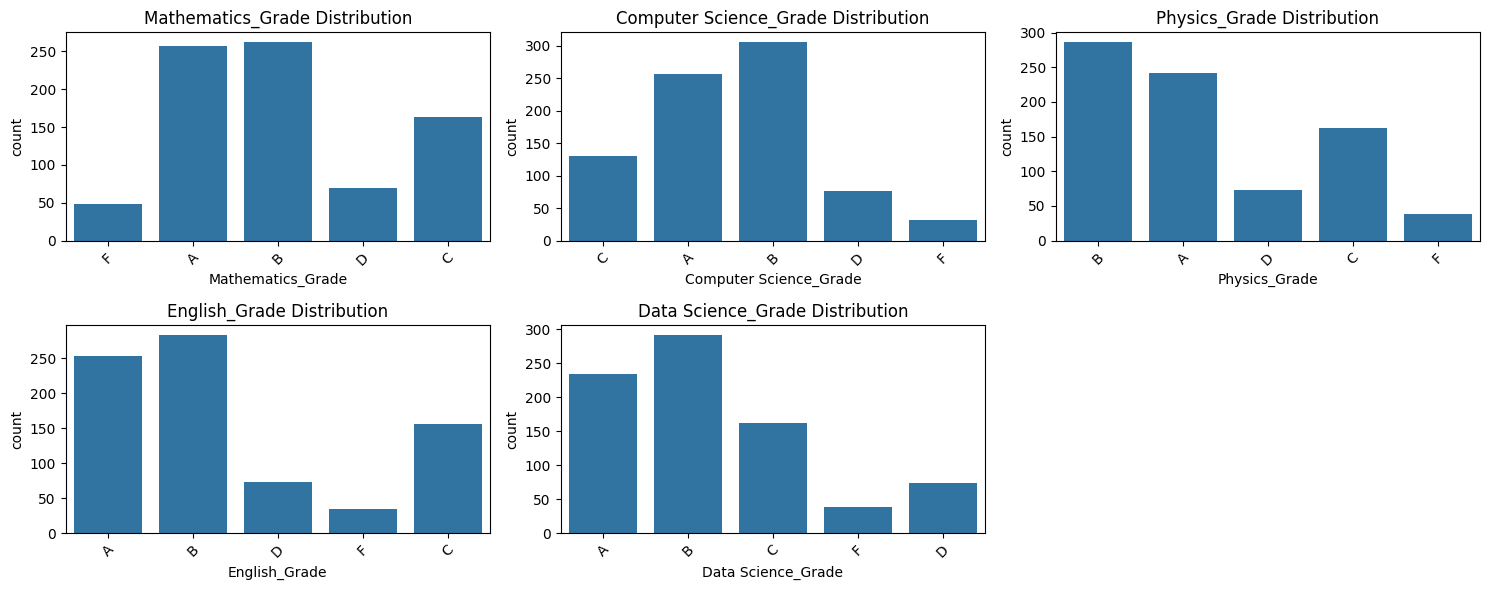

In [37]:
df = analyze_grades(df)

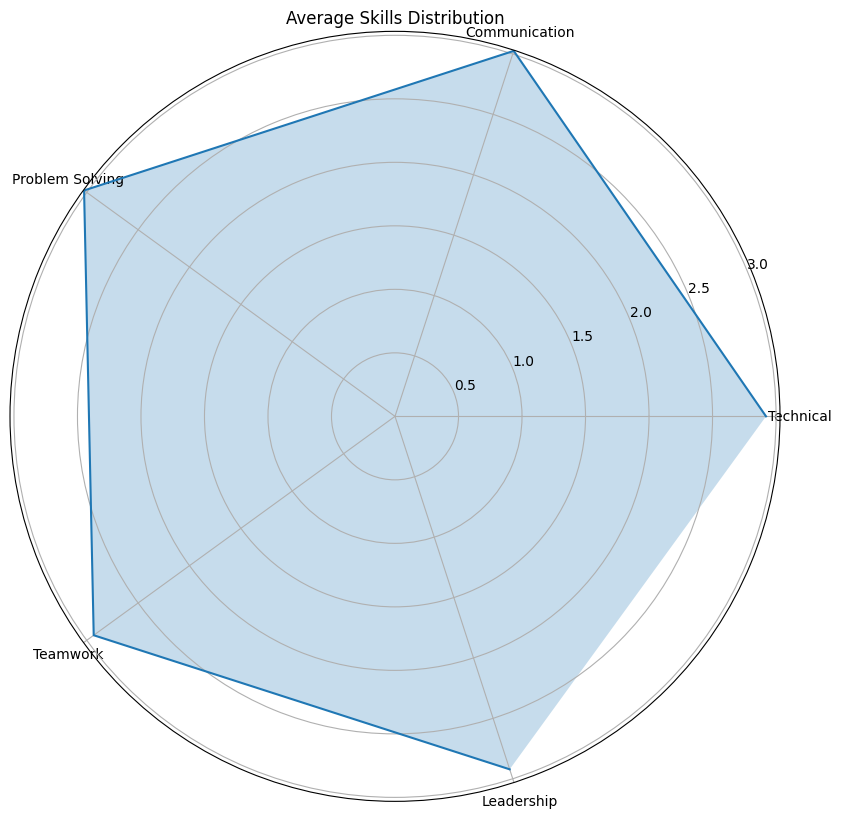

In [38]:
skill_analysis = analyze_skills(df)

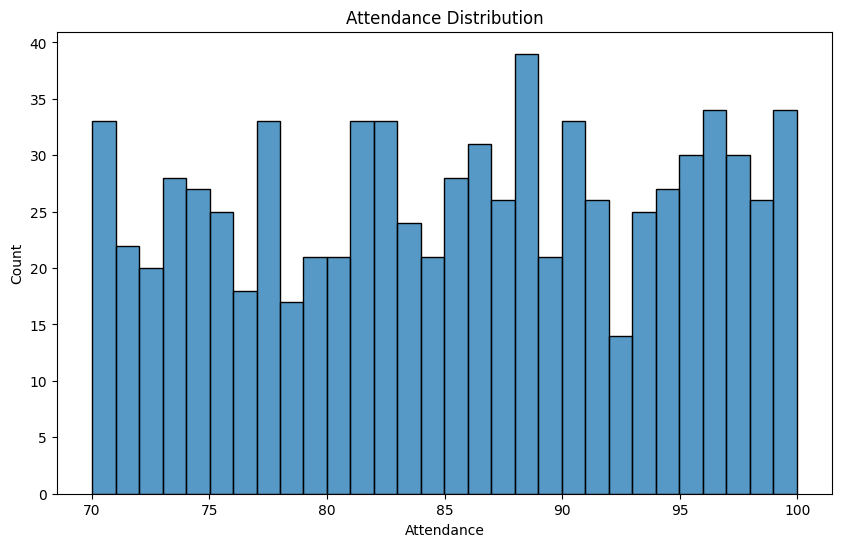

In [39]:
attendance_stats = analyze_attendance(df)

C:\Users\Bacardi\AppData\Local\Temp\ipykernel_8428\642951450.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=progress_df, x='Semester', y='GPA', ci=None)


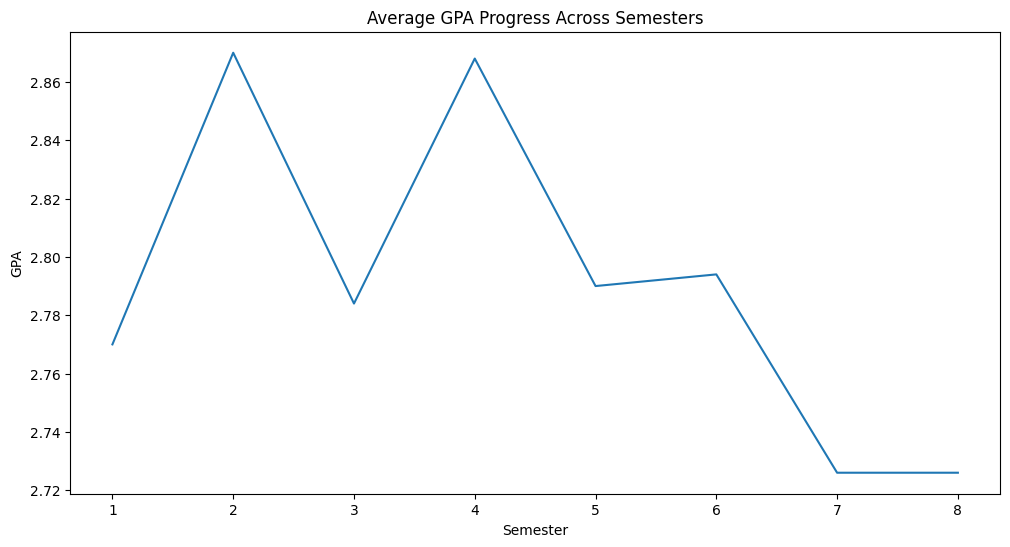

In [40]:
progress_data = analyze_progress(df)
plt.show()

In [ ]:
# #Week 1 Progress Report - FYUGP Student Progress Tracking System
# Tasks Completed

# Project Setup
# Created GitHub repository with organized structure Set up local development environment Installed and configured required dependencies Established coding standards and documentation templates

# Data Generation
# Implemented synthetic data generator Generated initial dataset with 100 students Created comprehensive data dictionary Validated data quality and consistency

# Exploratory Data Analysis
# Performed initial data exploration Created visualizations for:

# Grade distributions Attendance patterns Skills assessment Extracurricular participation

# Documented key insights and patterns

# Challenges Faced

# Data Generation

# Ensuring realistic grade distributions Creating meaningful correlations between variables Solution: Implemented weighted random sampling and correlation matrices

# Project Structure

# Organizing code for scalability Setting up efficient workflow Solution: Adopted industry-standard project structure with clear separation of concerns

# Next Week's Plan

# Backend Development

# Design database schema Implement data processing functions Create API endpoints

# Analytics Development

# Implement grade analysis system Develop skills assessment metrics Create progress tracking algorithms

# Resources Needed

# Additional documentation on:

# Best practices for educational analytics Student performance metrics Progress tracking methodologies

# Technical requirements:

# Database design patterns API development guidelines

# Questions/Concerns

# Scalability considerations for larger datasets Additional metrics to include in analysis Integration requirements with existing systems

# Time Allocation

# Project Setup: 20% Data Generation: 30% EDA: 40% Documentation: 10%

# Attachments

# Initial EDA Notebook Data Generation Scripts Project Structure Documentation)